#Samer Baslan
#CMPE-297: Deep Auto ViML NLP Sentiment Analysis
#Fall 2021

Resource used: <br > https://github.com/wasaequreshi/CMPE-297-ET/blob/master/hw4/hw_4_autoviml_nlp.ipynb
<br >
Dataset used: <br > https://www.kaggle.com/columbine/imdb-dataset-sentiment-analysis-in-csv-format

##Installs

In [1]:
!pip install deep_autoviml==0.0.67

     |████████████████████████████████| 269 kB 4.2 MB/s 
     |████████████████████████████████| 14.5 MB 47.7 MB/s 
     |████████████████████████████████| 170 kB 61.9 MB/s 
     |████████████████████████████████| 23.2 MB 83.6 MB/s 
     |████████████████████████████████| 308 kB 58.3 MB/s 
     |████████████████████████████████| 4.4 MB 45.9 MB/s 
     |████████████████████████████████| 80 kB 11.8 MB/s 
     |████████████████████████████████| 209 kB 68.3 MB/s 
     |████████████████████████████████| 75 kB 5.6 MB/s 
     |████████████████████████████████| 111 kB 71.3 MB/s 
     |████████████████████████████████| 49 kB 7.3 MB/s 
     |████████████████████████████████| 144 kB 61.9 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=975ae1229fca6c8b0b6bd0823d6fc219796c6d4f1a36a53cf1cf112ca0b32de2
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
  Created wheel for pyperclip: filename=pyperclip-1.

##Imports

In [14]:
from deep_autoviml import deep_autoviml as deepauto
from deep_autoviml.utilities.utilities import plot_classification_results

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error

##Load Data/Setup

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download columbine/imdb-dataset-sentiment-analysis-in-csv-format
!unzip imdb-dataset-sentiment-analysis-in-csv-format

 35% 9.00M/25.7M [00:01<00:02, 7.83MB/s]
100% 25.7M/25.7M [00:01<00:00, 17.2MB/s]
Archive:  imdb-dataset-sentiment-analysis-in-csv-format.zip
  inflating: Test.csv                
  inflating: Train.csv               
  inflating: Valid.csv               


In [4]:
train = pd.read_csv("Train.csv")
train

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


##Hyperparameters

In [5]:
target = "label"
keras_model_type = "USE"
project_name = "imdb_sentiment"


model_options = {
    "max_trials": 10,
    "tuner": "storm"
}
keras_options = {
    "epochs": 10,
    "steps_per_epoch": 15,
    "class_weight": True,
    "early_stopping": True
}

##Train

Num GPUs Available:  1
1 Physical GPUs, 1 Logical GPU
Physical devices cannot be modified after being initialized
Setting Mirrored GPU strategy using 1 devices
Using following keras_options given as input:
    epochs : 10
    steps_per_epoch : 15
    class_weight : True
    early_stopping : True
Using following model_options given as input:
    max_trials : 10
    tuner : storm
Max Trials : 10. Please increase max_trials if you want to better accuracy...

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
Alert! Modified column names to satisfy rules for column names in Tensorflow...
    Model type is Classification and Single_Label problem
    Classifying variables using data sample in pandas...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying v

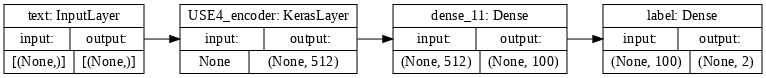

Model plot saved in file: deep_autoviml_imdb_sentiment_USE_model_before.png

#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Training a USE model option...
    class_weights: {0: 1.0, 1: 1.0009509033581903}
    original datasize = 40000, initial batchsize = 32
    recommended steps per epoch = 625
    recommended OneCycle steps = 12500
    default initializer = lecun_normal, default activation = selu
    Recommended: Increase patience for "onecycle" scheduler
Tensorboard log directory can be found at: deep_autoviml/mylogs
    chosen keras LR scheduler = default
    val mode = max, val monitor = val_balanced_sparse_categorical_accuracy, patience = 10.0
    number of epochs = 10, steps per epoch = 15

Splitting train into 80+20 percent: train and validation data
    Splitting validation 2

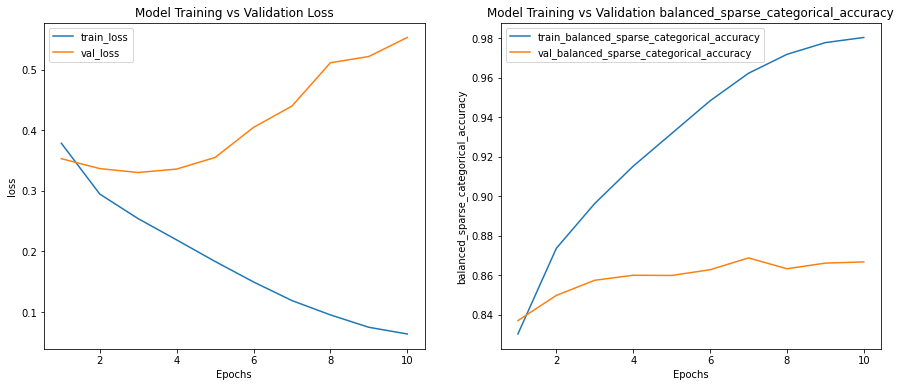


###########################################################
         Held-out test data set Results:
Single Label, Multi Class Model Metrics Report: label
#################################################################


    Accuracy          = 86.7%
    Balanced Accuracy = 86.7%
    Precision         = 92.7%
    Average Precision = 87.4%
    Recall            = 79.7%
    F1 Score          = 85.7%
    ROC AUC           = 95.2%
#####################################################

Training on full train dataset for 0 epochs. This will take time...
    completed. Time taken (in mins) = 0


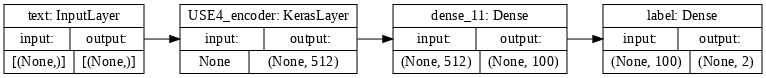

Model plot saved in file: deep_autoviml_imdb_sentiment_USE_model_after.png


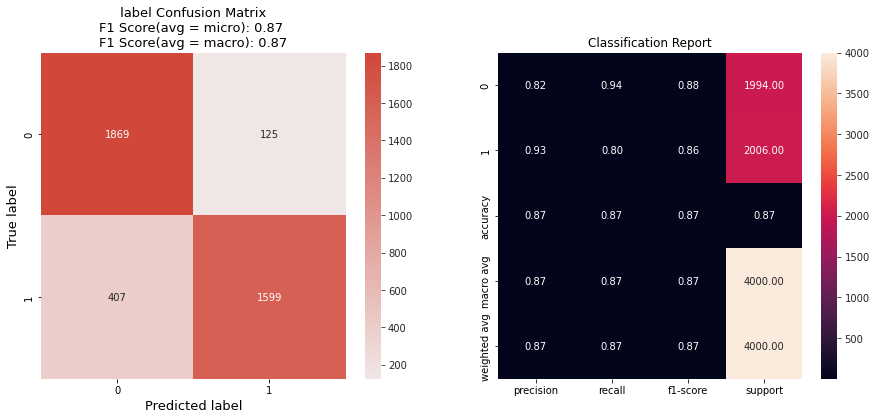

In [6]:
model, cat_vocab_dict = deepauto.fit(
    train,
    target,
    keras_model_type=keras_model_type,
    project_name=project_name,
    keras_options=keras_options,
    model_options=model_options,
    save_model_flag=True,
    use_my_model="",
    model_use_case="",
    verbose=1
)

##Results

In [8]:
predictions = deepauto.predict(model, project_name='imdb_sentiment', test_dataset='Train.csv',
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)


Loading deep_autoviml model from <keras.engine.functional.Functional object at 0x7ff9608e7d50> folder. This will take time...

Using <keras.engine.functional.Functional object at 0x7ff9608e7d50> model provided as input...
Time taken to load saved model = 0 seconds
Loaded test data size: 40000
Alert! Modified column names to satisfy rules for column names in Tensorflow...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    2 Predictors classified...
    possible latitude columns in dataset: []
        after further analysis, no latitude columns found
    possible longitude columns in dataset: []
        after further analysis, no longitude columns found
        No variables removed since no ID or low-information variables found in data set
Distribution of string columns in datatset:
    number of binary = 0, cats = 0, high cats = 0, very high cats = 1
Distribution of integer columns in datatset:
    number of binary = 1

In [10]:
test = pd.read_csv("Test.csv")

In [23]:
y_test = test["label"].values
y_preds = predictions[1]
labels = np.unique(y_test)

size = min(len(y_test), len(y_preds))
y_test = y_test[:size]
y_preds = y_preds[:size]

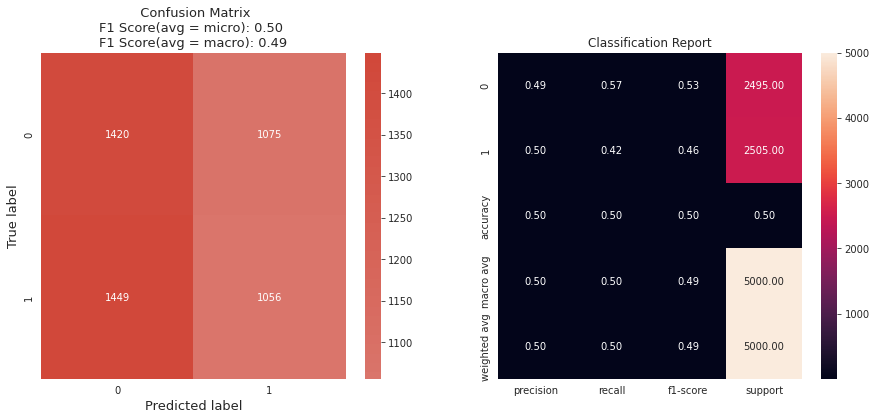

In [24]:
plot_classification_results(
    y_test,
    y_preds,
    labels,
    labels
)